In [99]:
import matplotlib.pyplot as plt
import numpy as np

- M represents the number of devices contending for random access in the channel.
- N represents the total number of available RAOs in the random access channel.


In [100]:

M = 10
NS1 =[]


### RAO Equation

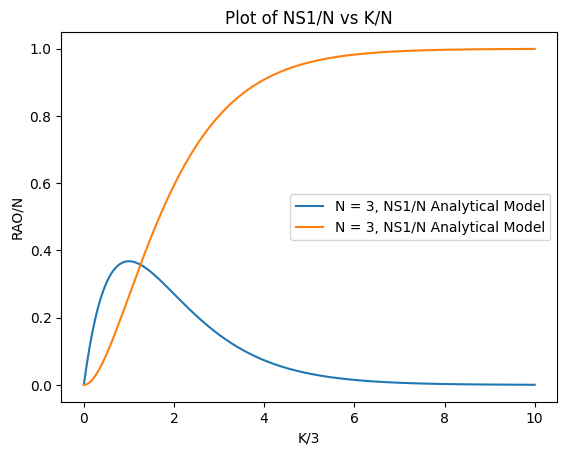

In [117]:

# NCi= N - K*np.exp(-K/N) - N1*np.exp(-K/N)

plt.title('Plot of NS1/N vs K/N')
for N in [3]:
    K = np.linspace(0, N*10, N*100)
    NS1 = K * np.exp(-K/N)  # Compute NS1 inside the loop
    plt.plot(K/N, NS1/N, label=f'N = {N}, NS1/N Analytical Model')
    
for N in [3]:
    K = np.linspace(0, N*10, N*100)
    NS1 = N - K * np.exp(-K/N) - N * np.exp(-K/N)  # Compute NS1 inside the loop
    plt.plot(K/N, NS1/N, label=f'N = {N}, NS1/N Analytical Model')
# Adding labels and title
plt.xlabel('K/3')
plt.ylabel('RAO/N')

# Show legend
plt.legend()

# Display the plot
plt.show()